In [1]:
%matplotlib inline  
import pylab

import matplotlib.pyplot as plt

pylab.rcParams['figure.figsize'] = (5.0, 4.0)

from src.python.preprocess2 import *

from pymongo import MongoClient

asp = 'F'  # default: Molecular Function

client = MongoClient('mongodb://localhost:27017/')

db = client['prot2vec']

onto = get_ontology(asp)

In [2]:
# t0 = datetime(2014, 1, 1, 0, 0)
# t1 = datetime(2014, 9, 1, 0, 0)
t0 = datetime(2017, 1, 1, 0, 0)
t1 = datetime.utcnow()

trn_stream, tst_stream = get_training_and_validation_streams(db, t0, t1, asp, profile=False)
# trn_stream, tst_stream = get_random_training_and_validation_streams(db, asp, ratio=0.2)

seq2go_trn = trn_stream._seq2go
seq2go_tst = tst_stream._seq2go

100%
Finished loading 109591 mappings!
100%
Finished loading 32219 mappings!


In [3]:
len(seq2go_trn), len(seq2go_tst), len(seq2go_tst)/(len(seq2go_trn) + len(seq2go_tst)), len(set(seq2go_trn.keys()) & set(seq2go_tst.keys()))

(57137, 11660, 0.16948413448260824, 0)

In [4]:
for i, (k, v) in enumerate(seq2go_tst.items()):
    if i > 20: break
    print(k, v)

A0A0E2J8L1 {'GO:0000976', 'GO:0001217'}
A0A0H0Y234 {'GO:0000976', 'GO:0001216'}
A0A0H3AK48 {'GO:0000976', 'GO:0001216', 'GO:0001217'}
A0A0H3C2M1 {'GO:0000976', 'GO:0001216', 'GO:0001217'}
A0A0H3Q915 {'GO:0000976', 'GO:0001216', 'GO:0043565', 'GO:0001217'}
A0L9E2 {'GO:0043565'}
A0QVY5 {'GO:0000976', 'GO:0001217'}
A0R5H1 {'GO:0000976', 'GO:0001216'}
A1B3Z0 {'GO:0000976', 'GO:0001217'}
A3P7B1 {'GO:0000976', 'GO:0001216'}
A4QDE6 {'GO:0000976', 'GO:0001216', 'GO:0001217'}
A5F384 {'GO:0000976', 'GO:0001216', 'GO:0001217'}
A5F6G4 {'GO:0000976', 'GO:0001216', 'GO:0001217'}
A7MXJ7 {'GO:0000976', 'GO:0001216', 'GO:0043565', 'GO:0001217'}
A8AWB2 {'GO:0000976', 'GO:0001217'}
A8CG91 {'GO:0043565'}
A9BGA3 {'GO:0043565'}
B3G2A3 {'GO:0000976', 'GO:0001216'}
B5EV73 {'GO:0000976', 'GO:0001216', 'GO:0043565'}
B5Z6G7 {'GO:0001130', 'GO:0043565', 'GO:0000976', 'GO:0001217', 'GO:0001216', 'GO:0042802'}
B7J425 {'GO:0000976', 'GO:0001217'}


In [5]:
cls_tst = get_classes(seq2go_tst, onto)
cls_trn = get_classes(seq2go_trn, onto)

100%

In [6]:
len(cls_trn), len(cls_tst), len(set(cls_trn) & set(cls_tst)), len(set(cls_trn) - set(cls_tst)), len(set(cls_tst) - set(cls_trn))

(6657, 1493, 1402, 5255, 91)

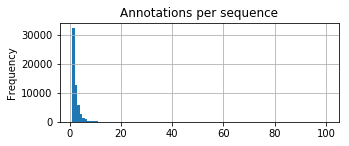

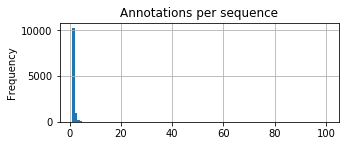

(5.0, 2.0)

In [7]:
lengths_trn = list(map(lambda annos: len(annos), seq2go_trn.values()))
lengths_tst = list(map(lambda annos: len(annos), seq2go_tst.values()))

plt.tight_layout()

plt.subplot(2, 1, 1)
plt.hist(lengths_trn, bins=100, range=(1, 100))
plt.title("Annotations per sequence")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.subplot(2, 1, 2)
plt.hist(lengths_tst, bins=100, range=(1, 100))
plt.title("Annotations per sequence")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

np.percentile(lengths_trn, 95, axis=0), np.percentile(lengths_tst, 95, axis=0)
# np.percentile(lengths_trn, 90, axis=0), np.percentile(lengths_tst, 90, axis=0)
# np.percentile(lengths_trn, 80, axis=0), np.percentile(lengths_tst, 80, axis=0)

In [8]:
onto.propagate(["GO:0005391"])

['GO:0003674',
 'GO:0005215',
 'GO:0022857',
 'GO:0015075',
 'GO:0008324',
 'GO:0015318',
 'GO:0022890',
 'GO:0046873',
 'GO:0003824',
 'GO:0016787',
 'GO:0022804',
 'GO:0016817',
 'GO:0016818',
 'GO:0016462',
 'GO:0017111',
 'GO:0016887',
 'GO:0042623',
 'GO:0015077',
 'GO:0022853',
 'GO:0015399',
 'GO:0015405',
 'GO:0043492',
 'GO:0042626',
 'GO:0042625',
 'GO:0015662',
 'GO:0019829',
 'GO:0015079',
 'GO:0015081',
 'GO:0008556',
 'GO:0005391']